In [3]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP','2016postVFP','2017','2018']
var_dict = [{}, {}, {}]
df_v8 = []
for year in years:
    print(f'Processing {year}')
    result = load(f"../results/{year}/makeDF/output_v8.coffea")
    if isinstance(result,tuple):
        result = result[0]
    for varName in result:
        for i in range(3):
            if f'{i}jets' in varName:
                if varName.replace(f'_{i}jets','') in var_dict[i]:
                    var_dict[i][varName.replace(f'_{i}jets','')] = np.append(var_dict[i][varName.replace(f'_{i}jets','')],result[varName].value)
                else:
                    var_dict[i][varName.replace(f'_{i}jets','')] = result[varName].value
for i in range(3):
    df_v8.append(pd.DataFrame(var_dict[i]))

Processing 2016preVFP
Processing 2016postVFP
Processing 2017
Processing 2018


In [4]:
var_dict = [{}, {}, {}]
df_v9 = []
for year in years:
    print(f'Processing {year}')
    result = load(f"../results/{year}/makeDF/output_v8.coffea")
    if isinstance(result,tuple):
        result = result[0]
    for varName in result:
        for i in range(3):
            if f'{i}jets' in varName:
                if varName.replace(f'_{i}jets','') in var_dict[i]:
                    var_dict[i][varName.replace(f'_{i}jets','')] = np.append(var_dict[i][varName.replace(f'_{i}jets','')],result[varName].value)
                else:
                    var_dict[i][varName.replace(f'_{i}jets','')] = result[varName].value
for i in range(3):
    df_v9.append(pd.DataFrame(var_dict[i]))

Processing 2016preVFP
Processing 2016postVFP
Processing 2017
Processing 2018


In [8]:
data_cuts_os_v8 = []
for i in range(2):
    data_cuts_os_v8.append(df_v8[i][(df_v8[i]['opp_charge']==1)])

data_cuts_os_v8.append(df_v8[2][( (df_v8[2]['label']==1)) & (df_v8[2]['isVBFcat']==0) & (df_v8[2]['opp_charge']==1)])
data_cuts_os_v8.append(df_v8[2][( (df_v8[2]['label']==1)) & (df_v8[2]['isVBFcat']==1) & (df_v8[2]['opp_charge']==1)])

In [9]:
data_cuts_os_v9 = []
for i in range(2):
    data_cuts_os_v9.append(df_v9[i][(df_v9[i]['opp_charge']==1)])

data_cuts_os_v9.append(df_v9[2][( (df_v9[2]['label']==1)) & (df_v9[2]['isVBFcat']==0) & (df_v9[2]['opp_charge']==1)])
data_cuts_os_v9.append(df_v9[2][( (df_v9[2]['label']==1)) & (df_v9[2]['isVBFcat']==1) & (df_v9[2]['opp_charge']==1)])

In [10]:
data_cuts_os_v8 = [pd.concat([data_cuts_os_v8[0],data_cuts_os_v8[1],data_cuts_os_v8[2]], axis=0, ignore_index=True), data_cuts_os_v8[-1]]
data_cuts_os_v9 = [pd.concat([data_cuts_os_v9[0],data_cuts_os_v9[1],data_cuts_os_v9[2]], axis=0, ignore_index=True), data_cuts_os_v9[-1]]

In [11]:
feature_names_2jets_GG = ['njets', 'met', 'DeltaEta_e_m', 'empt', 'DeltaPhi_em_met', 'j1pt', 'j1Eta', 'DeltaEta_j1_j2', 'j1_j2_mass', 'DeltaEta_j1_em', 'Ht_had', 'Rpt', 'j2pt', 'pt_cen_Deltapt']
feature_names_2jets_VBF = ['Zeppenfeld_DeltaEta', 'met', 'DeltaEta_e_m', 'empt', 'j1pt', 'DeltaEta_j1_j2', 'j1_j2_mass', 'Ht_had', 'Rpt', 'j2pt', 'pt_cen_Deltapt']

features_lists = [feature_names_2jets_GG, feature_names_2jets_VBF]
ncats = 2

In [40]:
features_map = {
    "mva": ['BDT Discriminator', 30, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 30, 110, 140],
    "met": ['$E^{miss}_{T}$ [GeV]', 30, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 30, 0, 200],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 30, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 30, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "e_m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 30, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 30, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 30, 30, 100], 
    "j2Eta": ['$\eta^{j_{2}}$', 30, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 30, 0, 450], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 30, 0, 4.5], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 30, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 30, -6, 6], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 50, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 30, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 40, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 6, 0, 6],
}

In [41]:
features_map_vbf = {
    "mva": ['BDT Discriminator', 25, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 30, 110, 140],
    "met": ['$E^{miss}_{T}$ [GeV]', 25, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 25, 0, 150],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 25, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 25, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 25, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 25, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 25, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 25, 30, 120], 
    "j2Eta": ['$\eta^{j_{2}}$', 25, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 25, 400, 1500], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 20, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 25, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 25, 2.5, 8], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 25, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 25, -1.5, 1.5], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 25, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 25, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 25, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 25, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 10, 0, 10],
}

In [15]:
#Load and predict from model
import xgboost as xgb
model_names = ["../XGBoost-for-HtoEMu/results/model_GG.json", "../XGBoost-for-HtoEMu/results/model_VBF.json"]
for i in range(ncats):
    print(i)
    model_out_file = model_names[i]
    model_load = xgb.XGBClassifier()
    model_load.load_model(model_out_file)
    data_cuts_os_v8[i]['mva'] = model_load.predict_proba(data_cuts_os_v8[i][features_lists[i]])[:,1]
    data_cuts_os_v9[i]['mva'] = model_load.predict_proba(data_cuts_os_v9[i][features_lists[i]])[:,1]

0


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1


/tmp/ipykernel_3988153/1341315719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuts_os_v8[i]['mva'] = model_load.predict_proba(data_cuts_os_v8[i][features_lists[i]])[:,1]
/tmp/ipykernel_3988153/1341315719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuts_os_v9[i]['mva'] = model_load.predict_proba(data_cuts_os_v9[i][features_lists[i]])[:,1]


In [46]:
dict_of_hists = [{}, {}]

from coffea import hist

dataset_axis = hist.Cat("dataset", "samples")
for i in range(ncats):
    if i==1:
        features_map_ = features_map_vbf
    else:
        features_map_ = features_map
    for var_ in features_lists[i]+['mva','e_m_Mass']:
        dict_of_hists[i][var_] = hist.Hist("Events", dataset_axis, hist.Bin(var_, features_map_[var_][0], features_map_[var_][1], features_map_[var_][2], features_map_[var_][3]))

for i, feature_names_ in zip(range(ncats), features_lists):
    for var_ in feature_names_+['mva','e_m_Mass']:
        arg = {var_: data_cuts_os_v8[i][var_].to_numpy(), 'dataset': 'v8', 'weight': data_cuts_os_v8[i]['weight'].to_numpy()}
        dict_of_hists[i][var_].fill(**arg)        
        arg = {var_: data_cuts_os_v9[i][var_].to_numpy(), 'dataset': 'v9', 'weight': data_cuts_os_v9[i]['weight'].to_numpy()}
        dict_of_hists[i][var_].fill(**arg)      



njets
met
DeltaEta_e_m


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


empt
DeltaPhi_em_met
j1pt
j1Eta
DeltaEta_j1_j2
j1_j2_mass


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


DeltaEta_j1_em
Ht_had
Rpt
j2pt
pt_cen_Deltapt
mva
e_m_Mass
Zeppenfeld_DeltaEta
met
DeltaEta_e_m


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


empt
j1pt


/tmp/ipykernel_3988153/3372040820.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax, rax) = plt.subplots(


DeltaEta_j1_j2
j1_j2_mass
Ht_had
Rpt
j2pt
pt_cen_Deltapt
mva


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


e_m_Mass


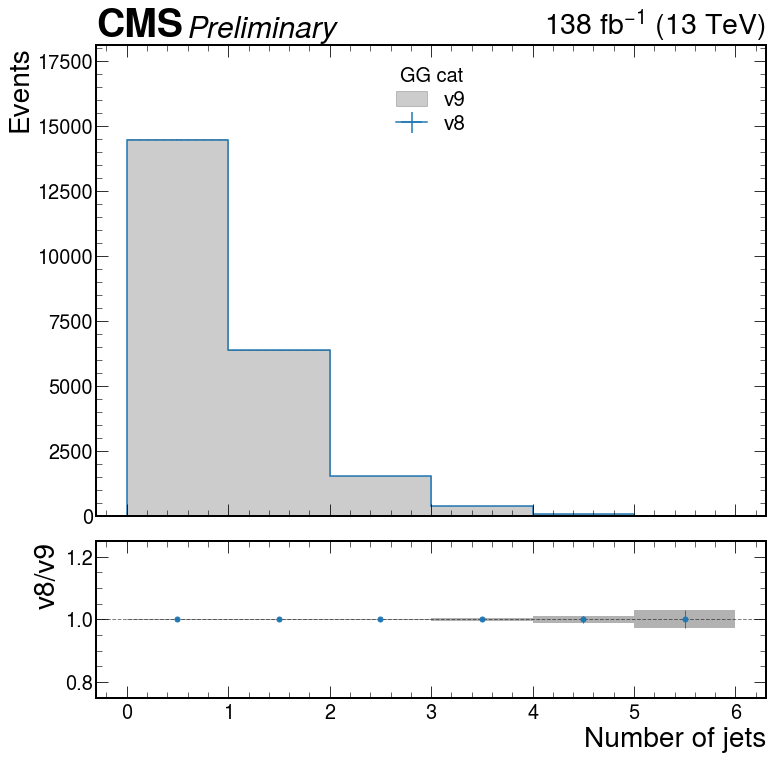

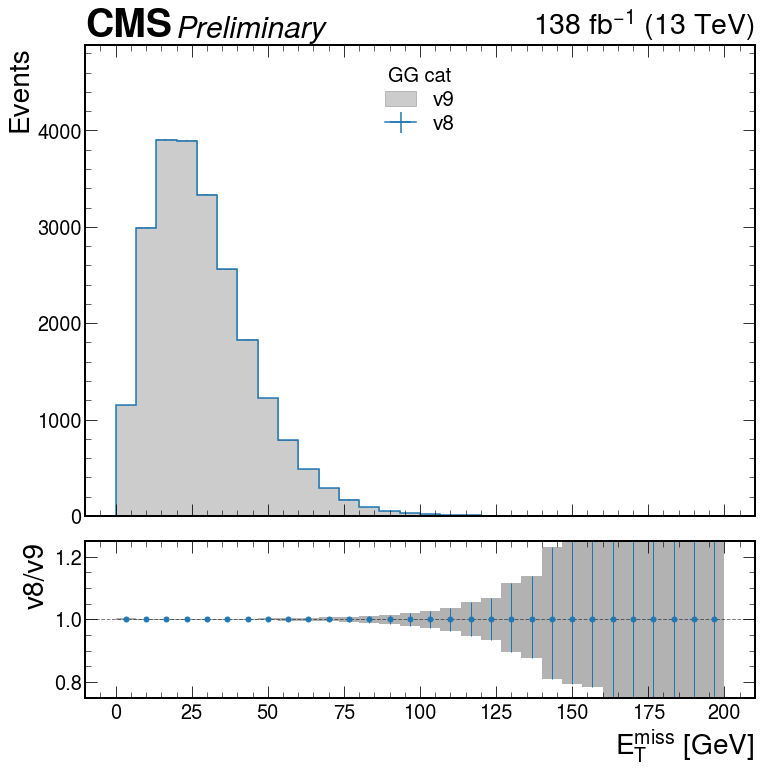

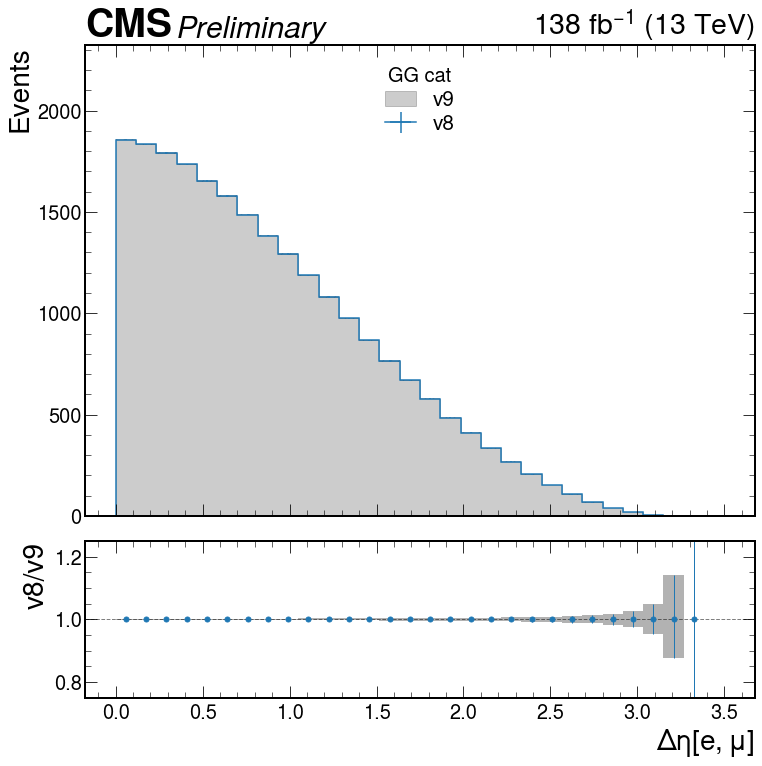

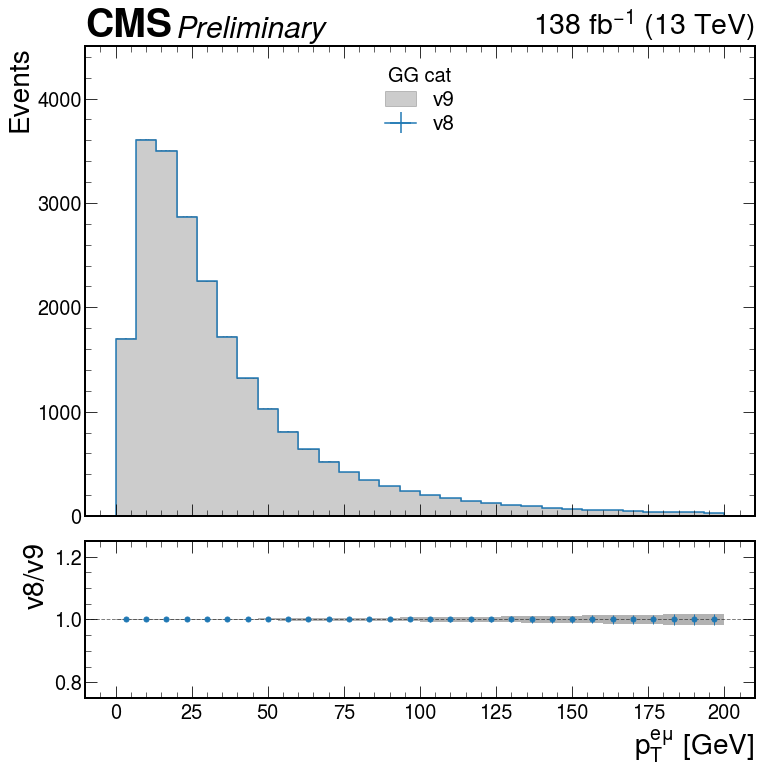

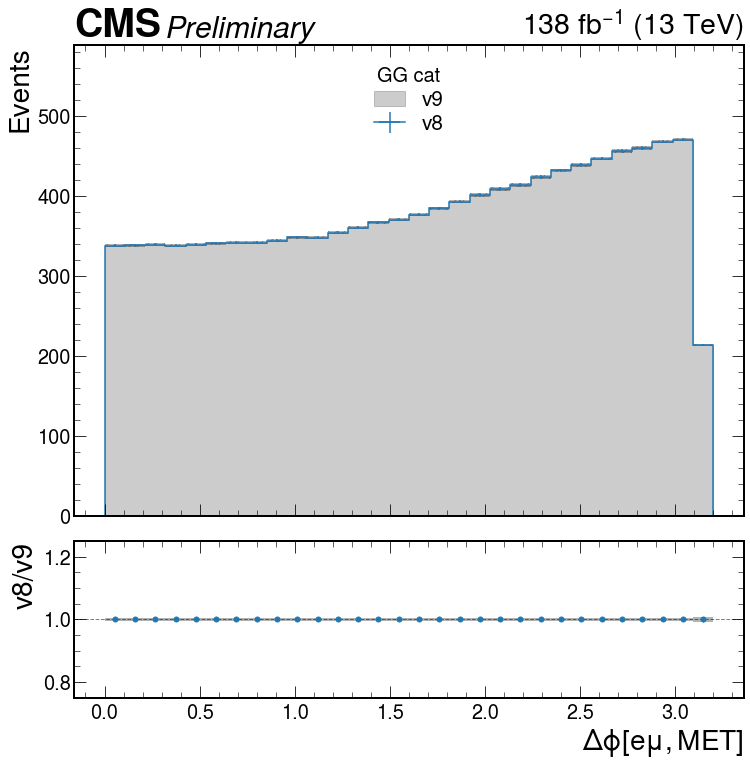

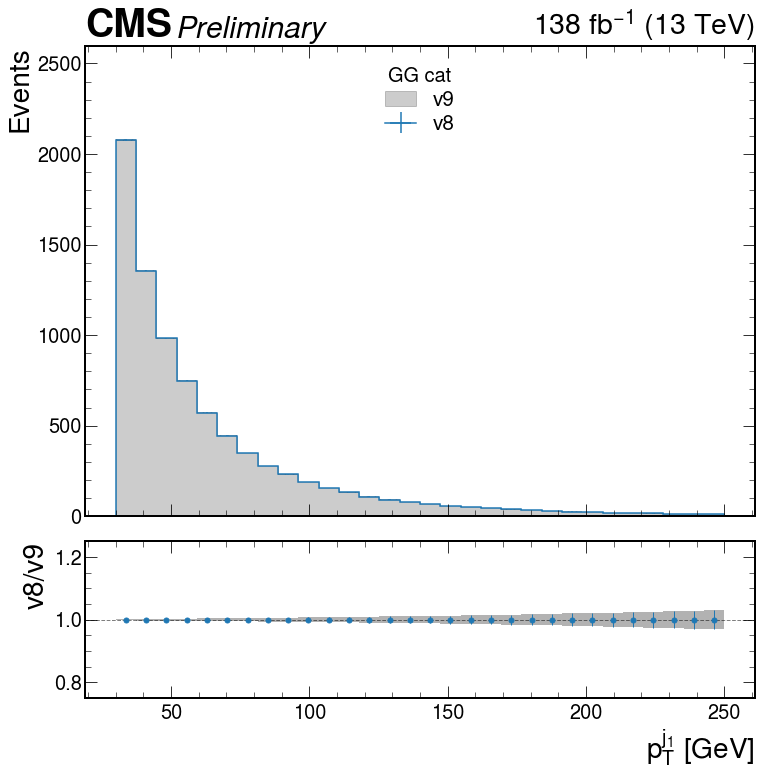

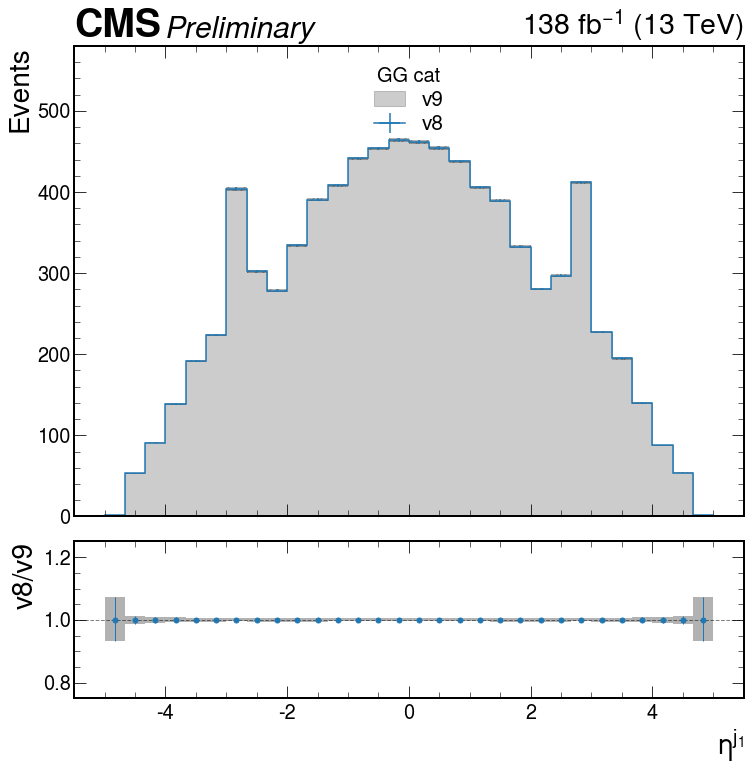

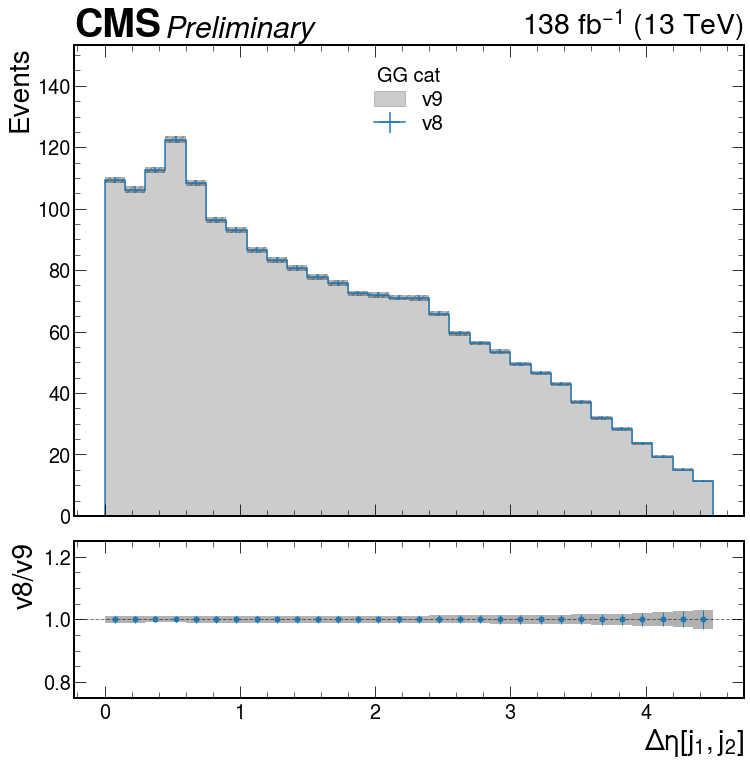

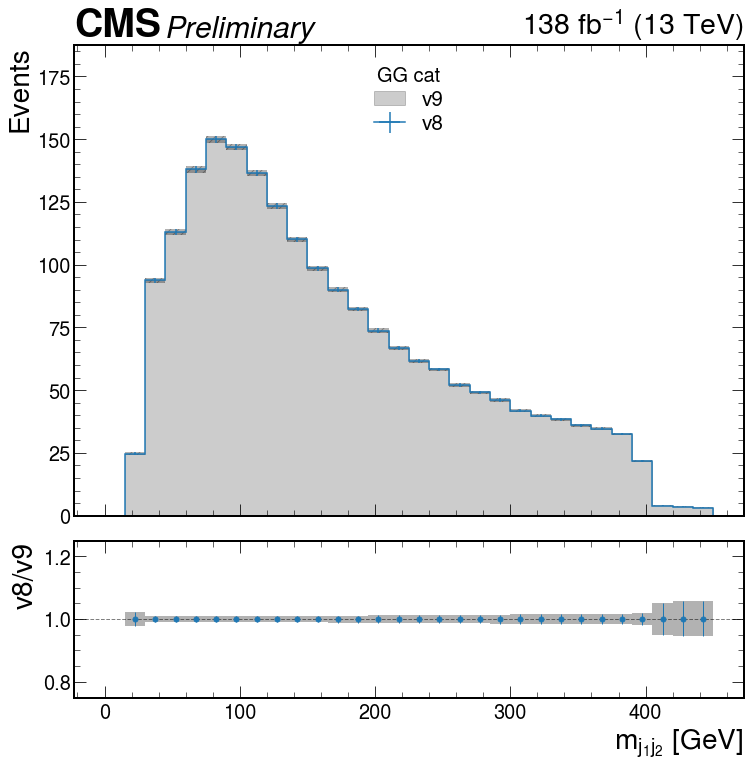

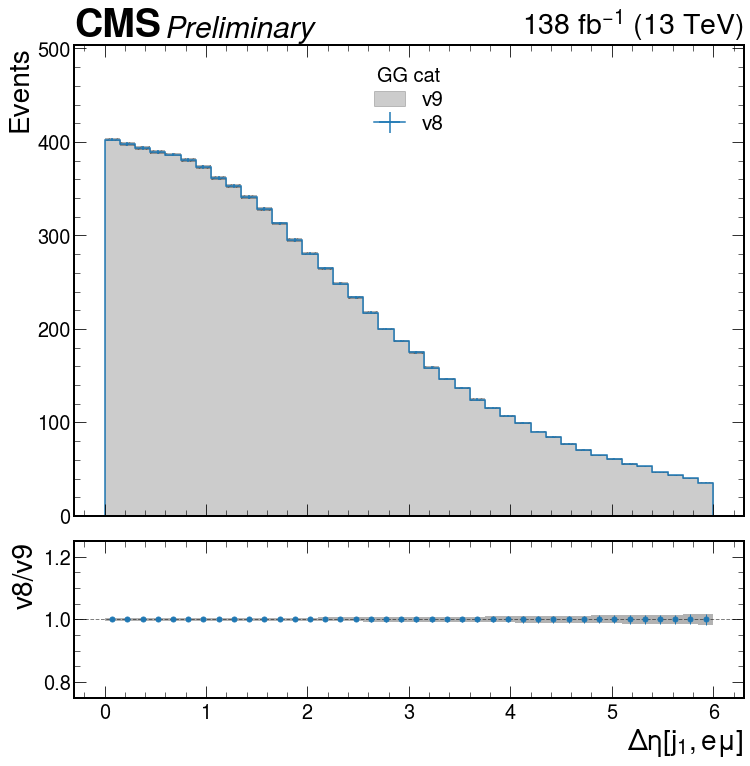

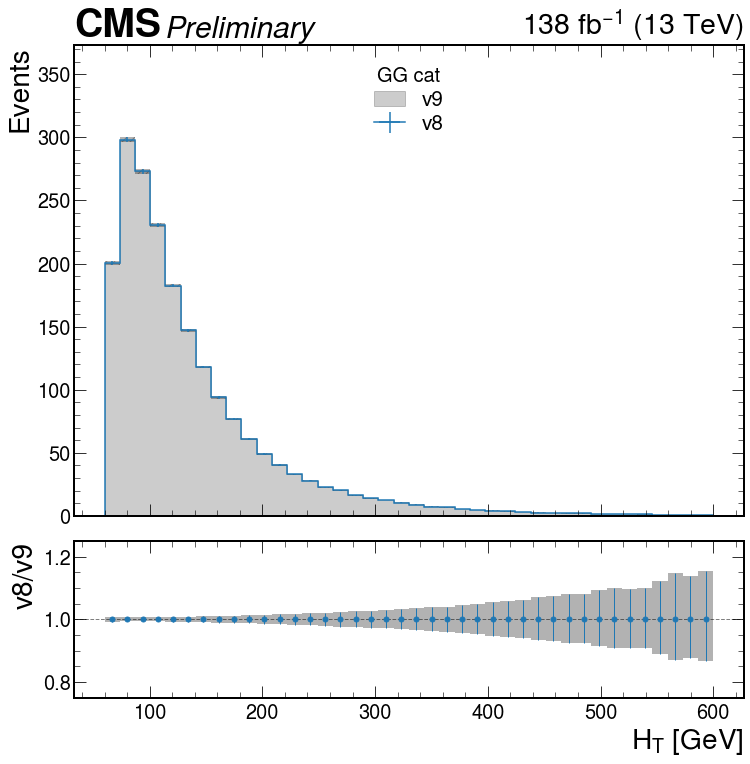

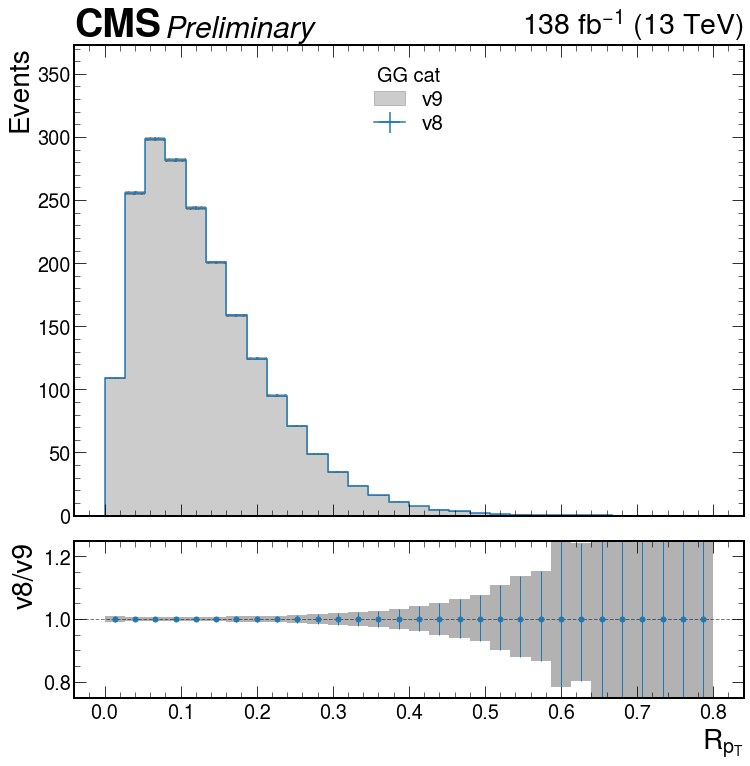

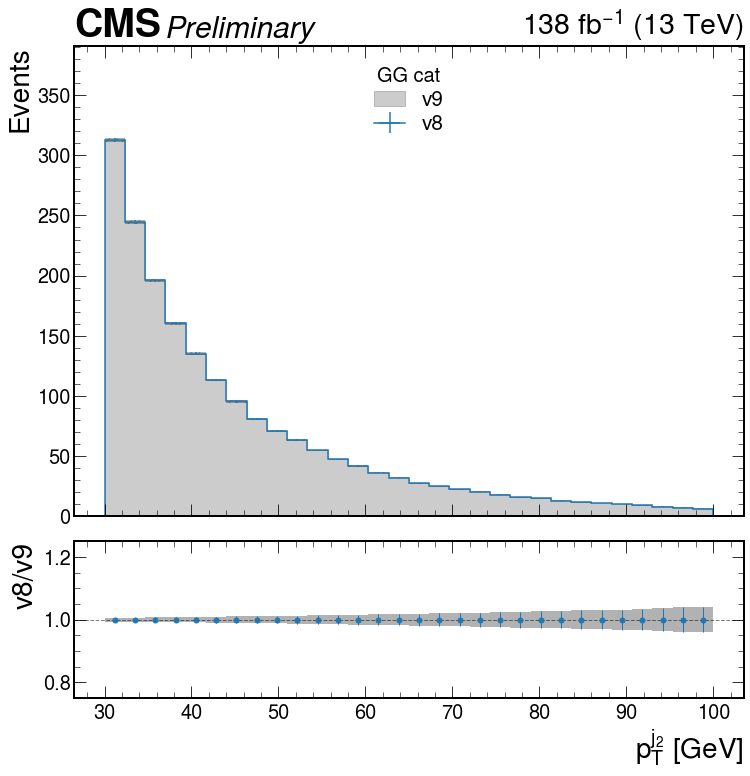

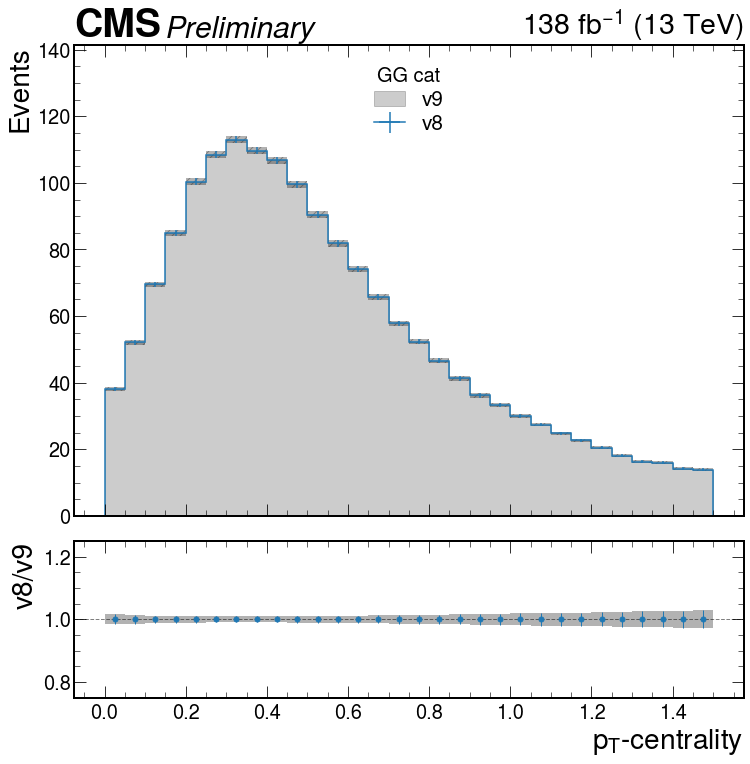

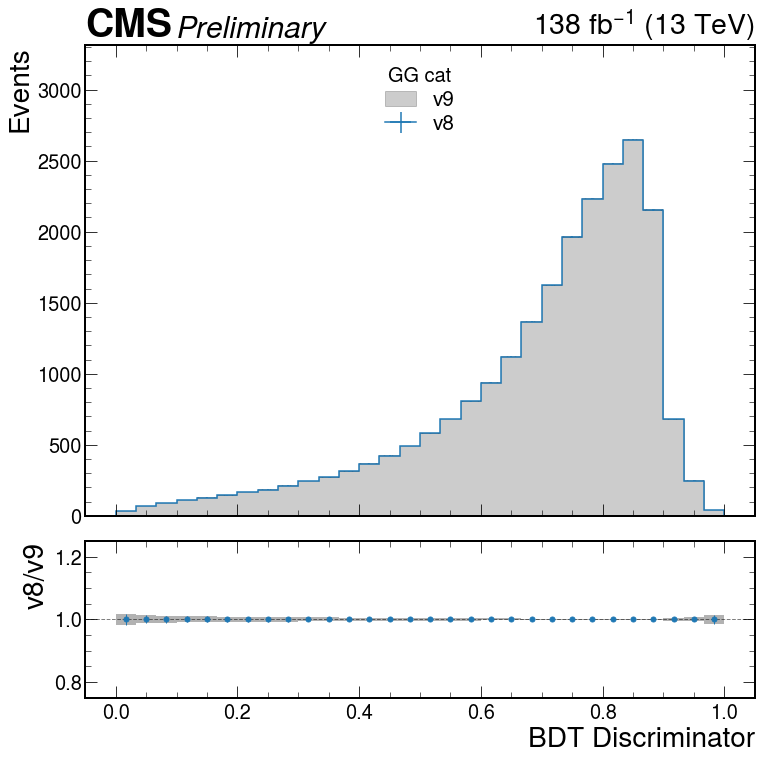

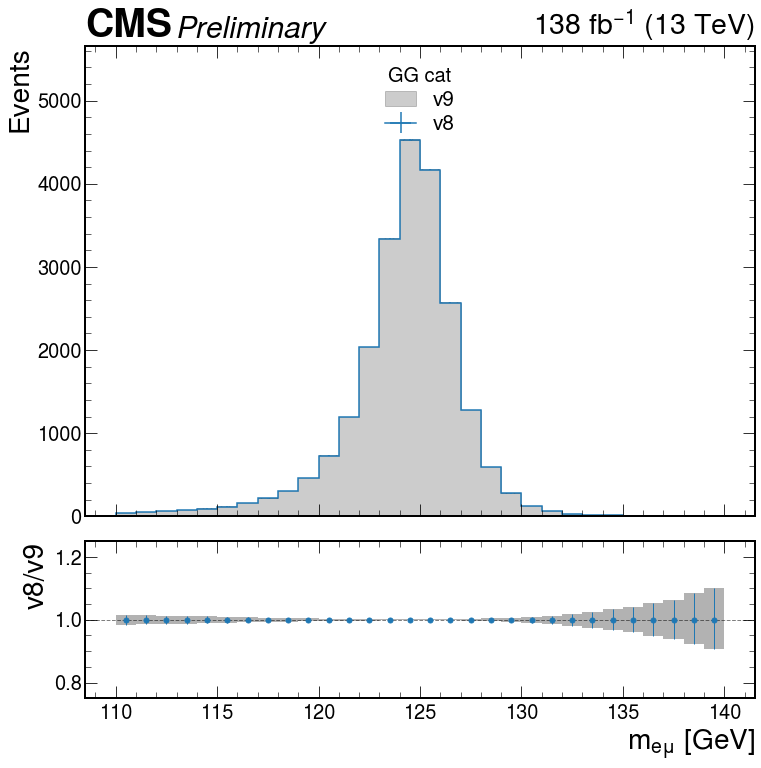

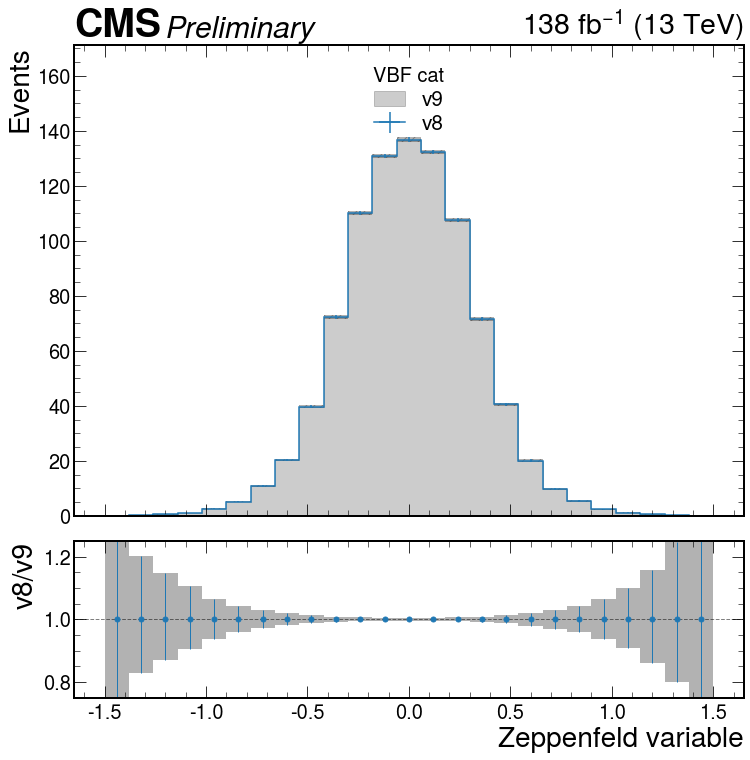

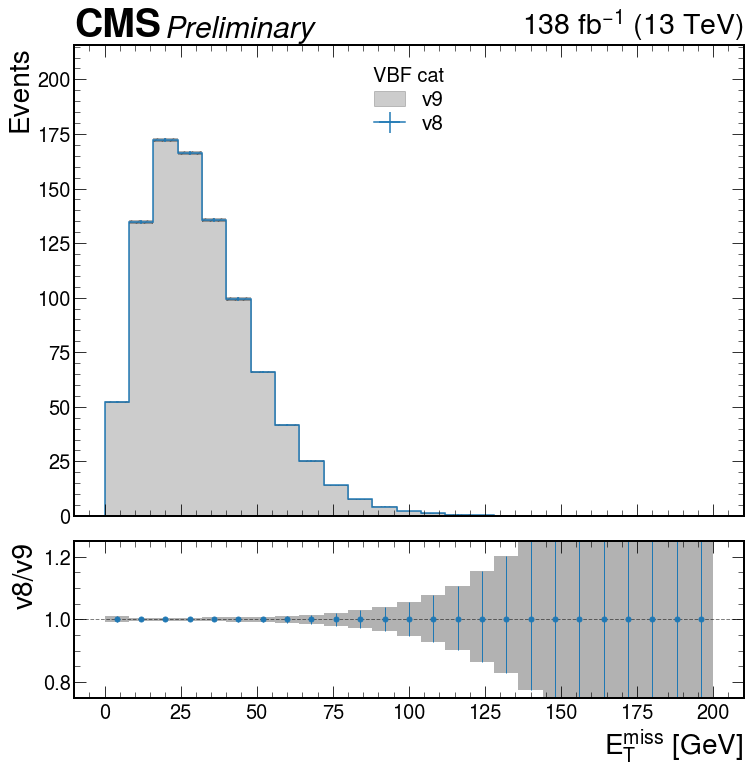

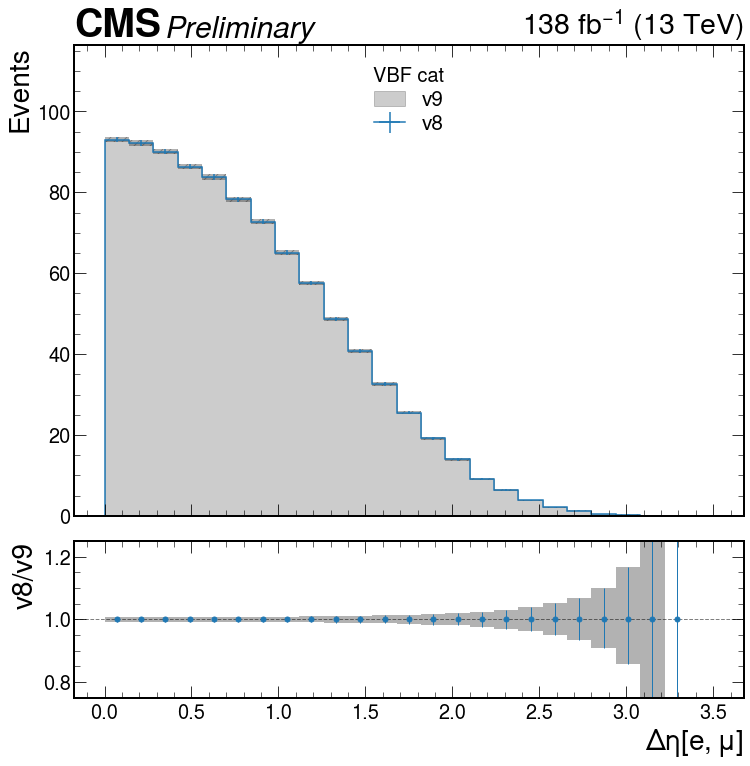

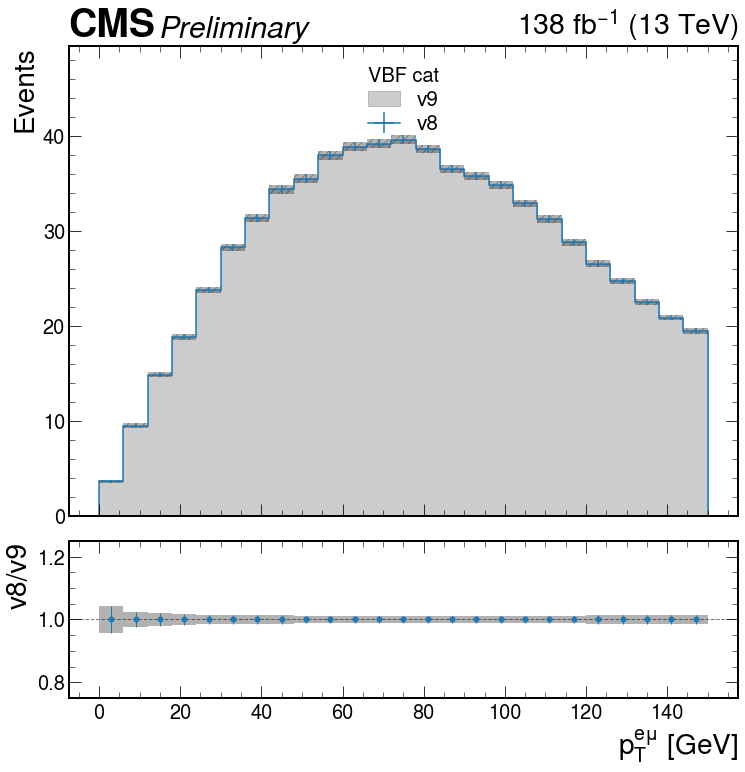

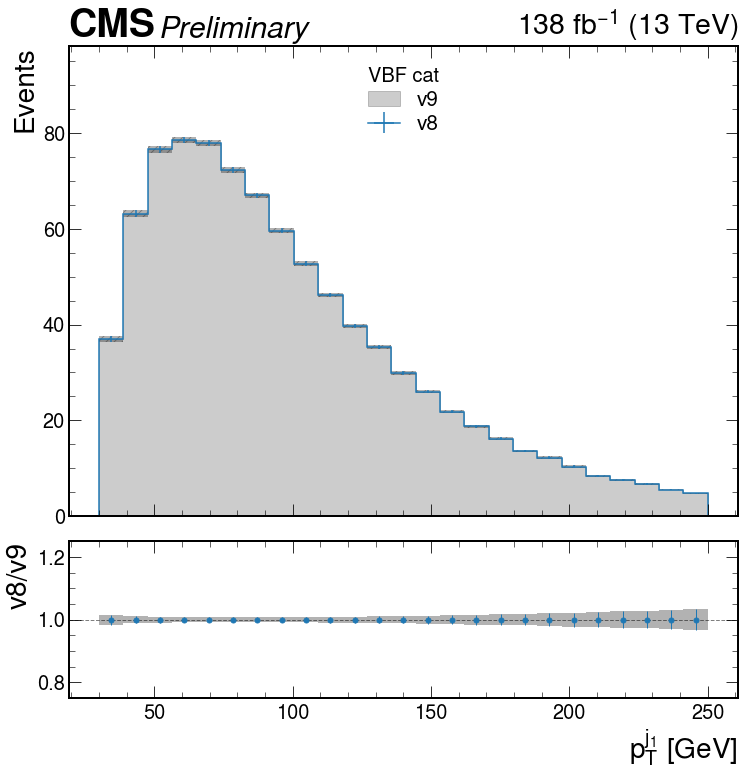

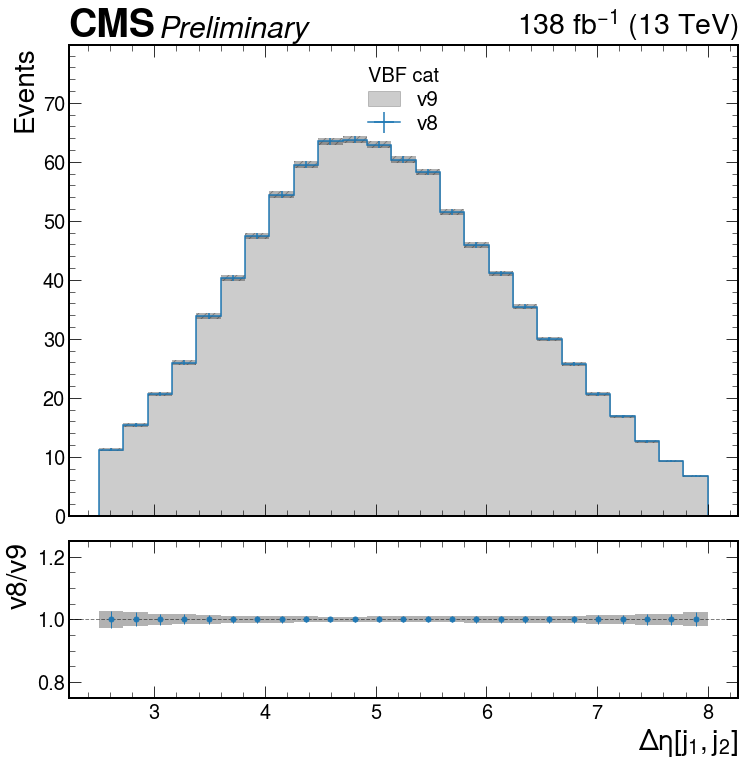

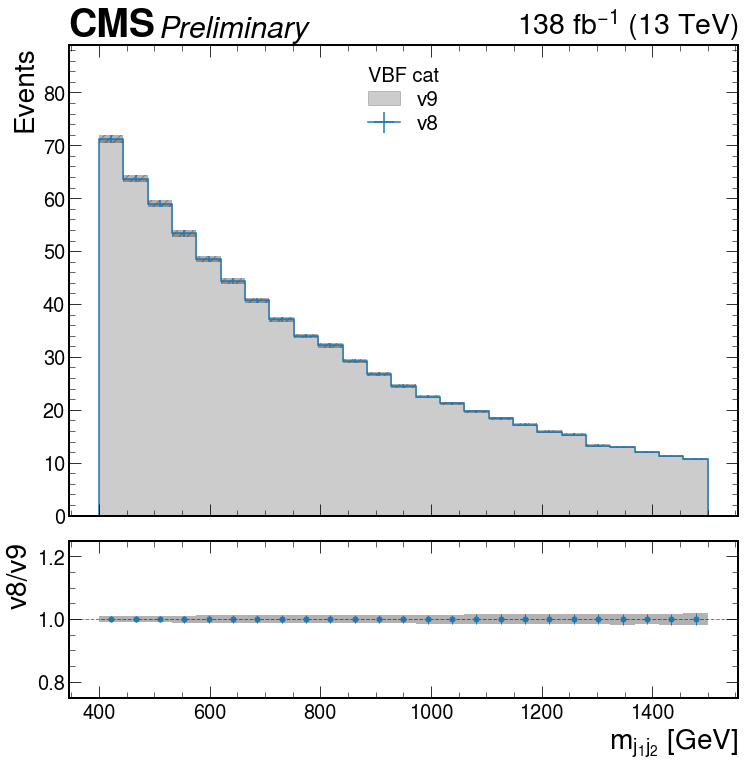

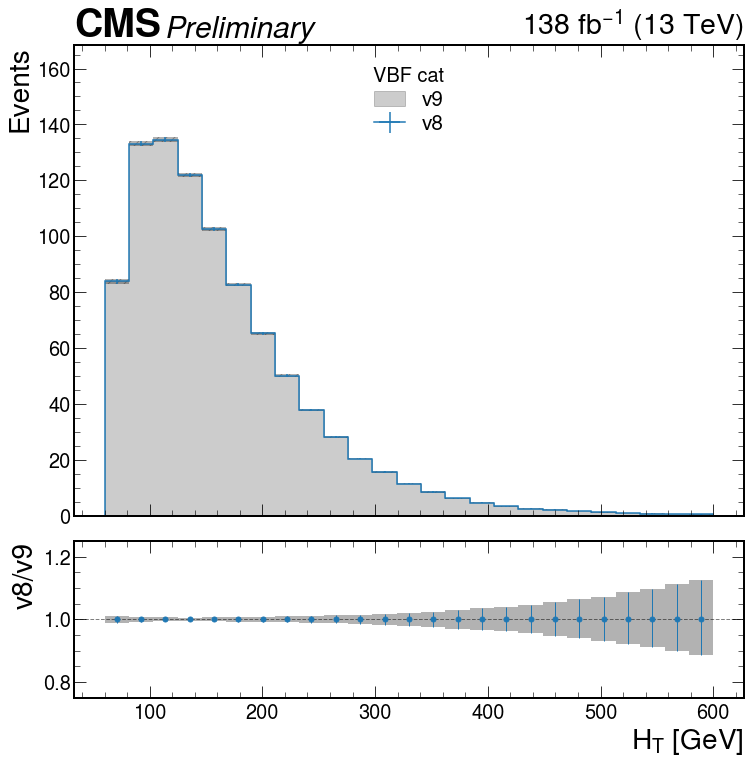

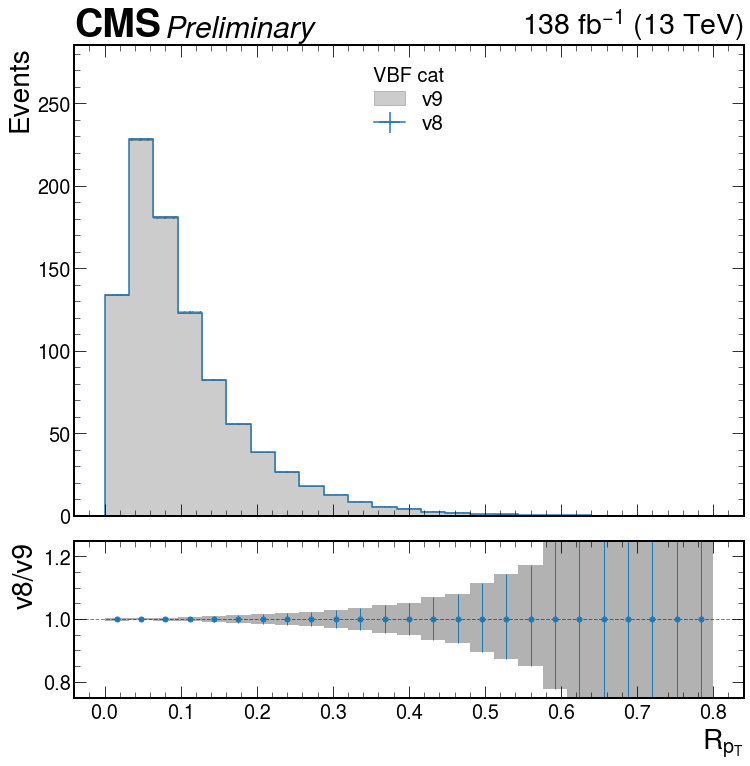

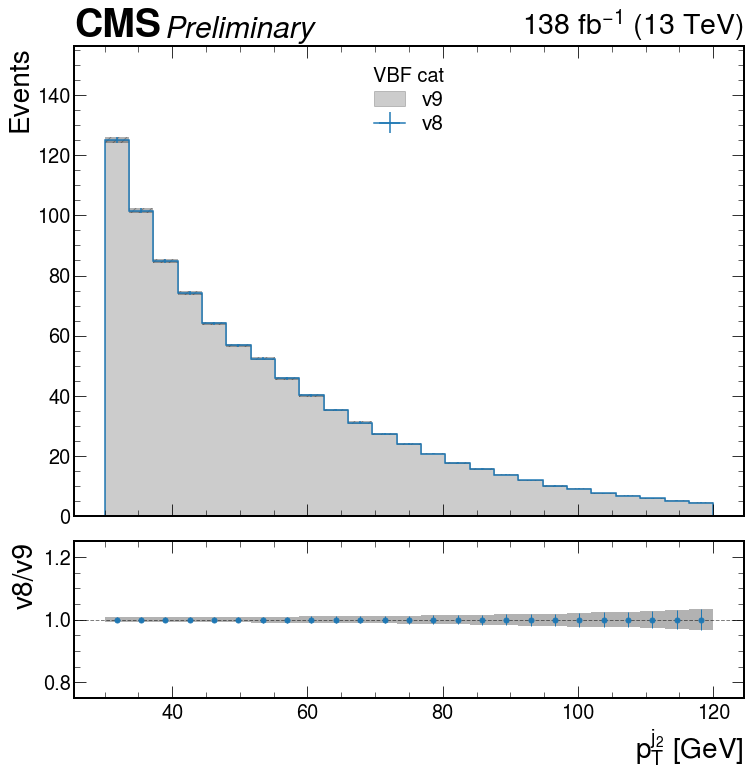

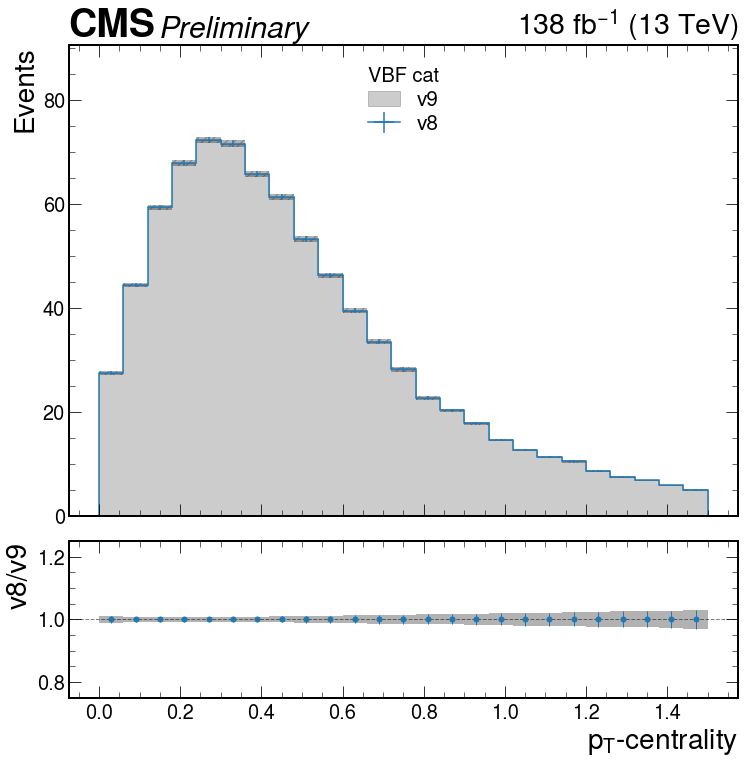

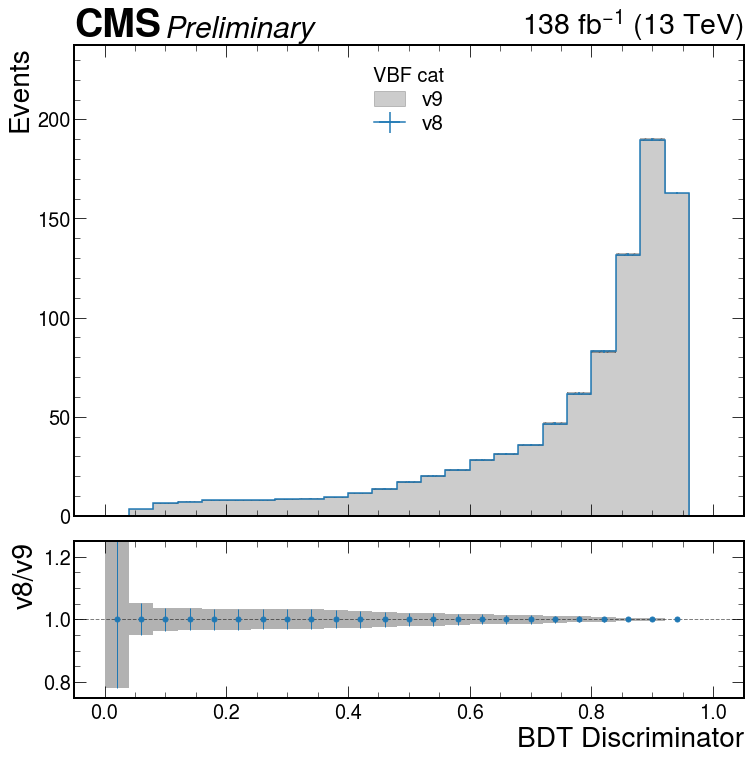

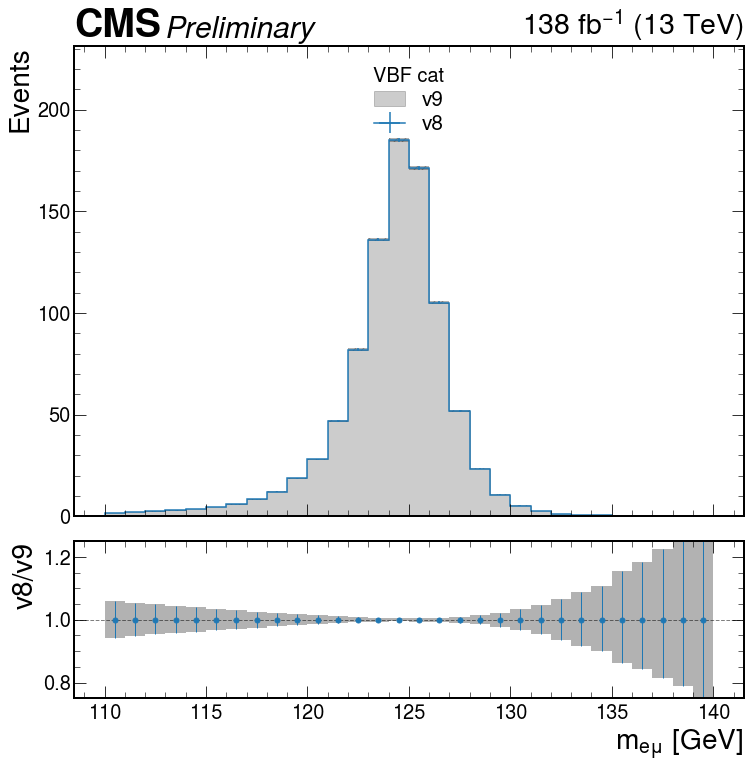

In [47]:
import mplhep
import matplotlib.pyplot as plt

%matplotlib inline
catlabels = ['GG cat', 'VBF cat']
for dict_of_hist, feature_names, catcatcat in zip(dict_of_hists, features_lists, catlabels):
    for var_ in feature_names+['mva', 'e_m_Mass']:
        print(var_)
        h = dict_of_hist[var_]
        plt.style.use(mplhep.style.CMS)
        plt.rcParams.update({
            'font.size': 30,
            'axes.titlesize': 24,
            'axes.labelsize': 28,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'legend.title_fontsize': 20
        })

        #For ratio plots
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(12,12),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )

        fig.subplots_adjust(hspace=.08)

        error_opts = {
            'label': '',
            'hatch': '///',
            'facecolor': 'k',
            'alpha': 0.3,
            'edgecolor': (0,0,0,.5),
            'linewidth': 0
        }

        hist.plot1d(
            h[['v9'],:],
            ax=ax,
            overlay='dataset',
            stack=True,
            clear=False,
            fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.2, 'facecolor': 'k'},
            error_opts=error_opts,
        )

        from cycler import cycler
        colors = ['#1f78b4','#33a02c']
        ax.set_prop_cycle(cycler(color=colors))

        hist.plot1d(h[['v8'],:], ax=ax, clear=False)
        ax.set_xlabel(None)
        ax.set_ylim(0, max(h.values()[('v9',)]*1.25))

        leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=1, loc=9, title=catcatcat)

        data_err_opts = {
                    'linestyle': 'none',
                    'marker': '.',
                    'markersize': 10.,
                    'color': '#1f78b4',
                    'elinewidth': 1,
                }


        hist.plotratio(
            num=h[['v8'],:].sum('dataset'),
            denom=h[['v9'],:].sum('dataset'),
            ax=rax,
            error_opts=data_err_opts,
            denom_fill_opts={},
            guide_opts={},
            unc='num',
            clear=False
        )

        #rax.set_xlim(0, 1)
        rax.set_ylim(0.75, 1.25)
        rax.set_ylabel("v8/v9", loc='center')

        lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
        fig.savefig(f'../XGBoost-for-HtoEMu/plots/v8v9/{var_}_{catcatcat}.png')